# Setup Part

In [41]:
# Import Library
import numpy as np
import pandas as pd
from scipy import stats as st
import statistics as stat
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [18]:
# Function to retrieve critical value from t-table
def get_t_table(alpha, tail, dof):
    if tail == 2:
        alpha /= 2
    return st.t.isf([alpha], [dof])[0]

In [12]:
# Gather the Data
url = 'https://raw.githubusercontent.com/jasonmiracleg/Ice_Cream_Hypothesis_Testing/main/Dataset/Ice_Cream_Dataset.csv'
original_df = pd.read_csv(url, sep=',')
original_df.head()

,Franchise ID,Franchise Name,City,Country,Number of Employees,Revenue,Profit,Expenses,Customer Satisfaction Score,Number of Transactions,Marketing Spent,Pre-Marketing Visitors,Post-Marketing Visitors
0,1,Cold Stone Creamery,New York,USA,17,150000,60000,90000,4.5,500,2000,500,1000
1,2,Baskin-Robbins,Los Angeles,USA,12,120000,50000,70000,4.3,450,1800,400,900
2,3,Dairy Queen,Chicago,USA,20,180000,75000,105000,4.2,550,2200,600,1100
3,4,Ben & Jerry's,Miami,USA,24,140000,58000,82000,4.6,480,1900,450,950
4,5,Haagen-Dazs,San Francisco,USA,12,100000,40000,60000,4.4,400,1600,350,800


# Managing the Data

## One Sample

### The 15 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 4.5.

In [14]:
df_italy = original_df[original_df['Country'] == 'Italy']
df_italy.head()

,Franchise ID,Franchise Name,City,Country,Number of Employees,Revenue,Profit,Expenses,Customer Satisfaction Score,Number of Transactions,Marketing Spent,Pre-Marketing Visitors,Post-Marketing Visitors
90,91,Gelateria Giolitti,Rome,Italy,10,150000,60000,90000,4.5,500,2000,500,1000
91,92,Gelateria Della Palma,Florence,Italy,14,120000,50000,70000,4.3,450,1800,400,900
92,93,Grom,Turin,Italy,11,180000,75000,105000,4.2,550,2200,600,1100
93,94,Gelateria La Carraia,Venice,Italy,21,140000,58000,82000,4.6,480,1900,450,950
94,95,Gelateria De' Medici,Milan,Italy,8,100000,40000,60000,4.4,400,1600,350,800


In [16]:
Xbar_italia = np.mean(df_italy['Customer Satisfaction Score'])
std_italia = np.std(df_italy['Customer Satisfaction Score'], ddof = 1)
print('the average of the customer satisfaction is', Xbar_italia)
print('the standard deviation is', std_italia)

the average of the customer satisfaction is 4.366666666666668
the standard deviation is 0.15430334996209188


### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

In [37]:
Xbar_employee = np.mean(original_df['Number of Employees'])
frequent_number_of_employees = stat.mode(original_df['Number of Employees'])
average_employees_per_country = original_df.groupby('Country')['Number of Employees'].mean().reset_index()
average_employees_per_country['Number of Employees'] = np.ceil(average_employees_per_country['Number of Employees'])
std_employees = np.std(original_df['Number of Employees'], ddof = 1)
print("The standard deviation is", std_employees)
print("The average of recorded number of employees :", int(math.ceil(Xbar_employee)))
print("The most frequent number of employees :", frequent_number_of_employees)
print(average_employees_per_country)

The standard deviation is 5.291178377965627
The average of recorded number of employees : 17
The most frequent number of employees : 14
     Country  Number of Employees
0  Australia                 17.0
1     Canada                 19.0
2      China                 18.0
3    Germany                 15.0
4  Indonesia                 17.0
5      Italy                 15.0
6     Russia                 15.0
7    Tianjin                 20.0
8        USA                 18.0


## Two Sample

### The USA ice cream franchise has more average expenses than Indonesia’s.

# Data Visualization

### The 15 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 4.5.

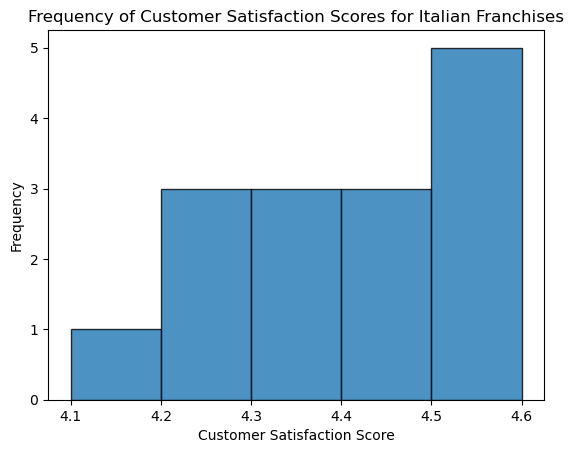

In [25]:
# Plot histogram of customer satisfaction scores
plt.hist(df_italy['Customer Satisfaction Score'], bins=5, alpha=0.8, edgecolor='black')

plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Frequency of Customer Satisfaction Scores for Italian Franchises')

plt.show()

### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

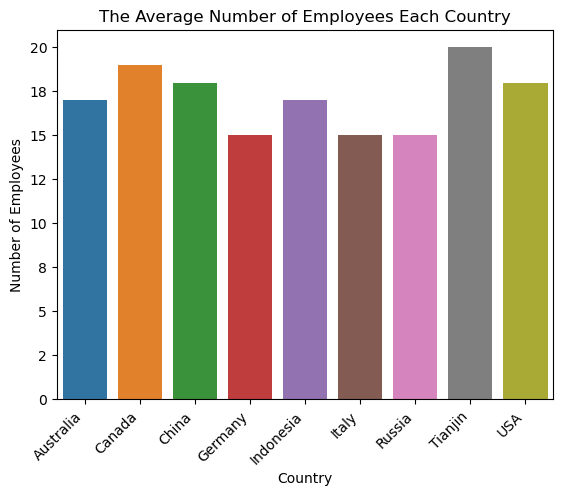

In [48]:
graph = sns.barplot(x=average_employees_per_country['Country'], y=average_employees_per_country['Number of Employees'], data=average_employees_per_country)
graph.set_title('The Average Number of Employees Each Country')
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, ha='right')
plt.show()

# Hypothesis Testing

## Hypothesis One Sample Test

### The 15 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 4.5

In [30]:
# Step 1 : State null and alternative hypothesis
# H0 : Miu <= 4.5
# H1 : Miu > 4.5

# Step 2 : Select level of significance and identify the known data
Miu = 4.5
n = 15
tail = 1
dof = n-1
alpha = 0.05

# Step 3 : Identify the test statistics
# Since this hypothesis only evaluates one sample, this test belongs to One Sample Test 
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decision rule
# H0 is rejected if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_italia - Miu) / (std_italia / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print("t_calculation = {:.2f}".format(t_calc))
print("t_table = {:.2f}".format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print("H0 is rejected. The Italia ice cream franchises indeed reach customer satisfaction scores above 4.5")
else:
    print("Fail to Reject H0. The Italia ice cream franchises hasn't reached customer satisfaction scores above 4.5")

t_calculation = -3.35
t_table = 1.76
Fail to Reject H0. The Italia ice cream franchises hasn't reached customer satisfaction scores above 4.5


### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

In [38]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu <= 15
# H1 : Miu > 15

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
Miu = 15
tail = 1
n = original_df['Number of Employees'].count()
dof = n-1

# Step 3 : Identify the test statistics
# Since this test only involves one sample, thi test belongs to One Sample Test
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_employee - Miu) / (std_employees / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print('H0 is rejected. The average number of employees that is needed is indeed greater than 15')
else:
    print('Fail to Reject H0. The average number of employees that is needed is below 15')

t_calculation = 2.81
t_table = 1.66
H0 is rejected. The average number of employees that is needed is indeed greater than 15


## Hypothesis Two Sample Test

### There’s a significant difference between pre-marketing visitor and post-marketing visitor because of the marketing spend.

In [ ]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu_pre_marketing <= Miu_post_marketing
# H1 : Miu > 15

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
Miu = 15
tail = 1
n = original_df['Number of Employees'].count()
dof = n-1

# Step 3 : Identify the test statistics
# Since this test only involves one sample, thi test belongs to One Sample Test
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_employee - Miu) / (std_employees / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print('H0 is rejected. The average number of employees that is needed is indeed greater than 15')
else:
    print('Fail to Reject H0. The average number of employees that is needed is below 15')

### The USA ice cream franchise has more average expenses than Indonesia’s.

In [ ]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu <= 15
# H1 : Miu > 15

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
Miu = 15
tail = 1
n = original_df['Number of Employees'].count()
dof = n-1

# Step 3 : Identify the test statistics
# Since this test only involves one sample, thi test belongs to One Sample Test
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_employee - Miu) / (std_employees / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print('H0 is rejected. The average number of employees that is needed is indeed greater than 15')
else:
    print('Fail to Reject H0. The average number of employees that is needed is below 15')